<a href="https://colab.research.google.com/github/IrinaProkofieva/AutoML/blob/main/AutoML_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорты**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import string

In [3]:
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Достаем данные**

**Предобработанные данные из обучающей выборке** (о том, как эти данные были получены, ниже)

In [4]:
preprocessed_data = pd.read_csv('/content/drive/MyDrive/toxic_comments/preprocessed_train_data.csv')
preprocessed_data

id                                       comment_text  \
0     0002bcb3da6cb337            CABEZA ANTES DE QUE PESES EN MI TRABAJO   
1     0005c987bdfc9d4b  Oye... ¿qué es lo que... @  hablar. ¿Qué es......   
2     0007e25b2121310b                 ¡No mires, ven o piensa en volver!   
3     001810bf8c45bf5f  ¿Eres gay o antisemita? ¡Arcángel WHIte Tiger ...   
4     00190820581d90ce        ¡A la mierda con tu madre en el culo, seca!   
...                ...                                                ...   
1846  0686e75d206dbd61  "Bu söz konusu olmaz. Bir haftadan uzun süredi...   
1847  0687f3591d0cb043  3 tür geothermal enerjinin 3 türünün ne olduğu...   
1848  06889bcb5e18bb47  Mary Walker "Mary Walker" Bilmek zorundayım......   
1849  0688fb9174122530  Wikipedia Administrators Attention Wikipedia A...   
1850  068917d9eebd769d  Ne tür Wikipedia'nın kılavuzları olduğunu gerç...   

      toxic  severe_toxic  obscene  threat  insult  identity_hate lang  
0         1             1        1       0       1              0   es  
1         1             0        0       0       0              0   es  
2         1             0        0       0       0              0   es  
3         1             0        1       0       1              1   es  
4         1             0        1       0       1              0   es  
...     ...           ...      ...     ...     ...            ...  ...  
1846      0             0        0       0       0              0   tr  
1847      0             0        0       0       0              0   tr  
1848      0             0        0       0       0              0   tr  
1849      0             0        0       0       0              0   tr  
1850      0             0        0       0       0              0   tr  

[1851 rows x 9 columns]

**Валидационная выборка**

In [5]:
val_data = pd.read_csv('/content/drive/MyDrive/toxic_comments/validation.csv')
val_data

id                                       comment_text lang  toxic
0        0  Este usuario ni siquiera llega al rango de    ...   es      0
1        1  Il testo di questa voce pare esser scopiazzato...   it      0
2        2  Vale. Sólo expongo mi pasado. Todo tiempo pasa...   es      1
3        3  Bu maddenin alt başlığı olarak  uluslararası i...   tr      0
4        4  Belçika nın şehirlerinin yanında ilçe ve belde...   tr      0
...    ...                                                ...  ...    ...
7995  7995   Il fatto è che la pagina dei personaggi minor...   it      0
7996  7996  El imbesil ete dela luna no se entera ni ostia...   es      1
7997  7997  olum sız manyakmısınz siz adam sıze sanal yıld...   tr      1
7998  7998  El mapa del reinado de Alhaken esta ligerament...   es      0
7999  7999  lasciami la tua email per favore. ad ogni modo...   it      0

[8000 rows x 4 columns]

**Тестовая выборка**

In [6]:
test_data = pd.read_csv('/content/drive/MyDrive/toxic_comments/test.csv')
test_data

id                                            content lang
0          0  Doctor Who adlı viki başlığına 12. doctor olar...   tr
1          1   Вполне возможно, но я пока не вижу необходимо...   ru
2          2  Quindi tu sei uno di quelli   conservativi  , ...   it
3          3  Malesef gerçekleştirilmedi ancak şöyle bir şey...   tr
4          4  :Resim:Seldabagcan.jpg resminde kaynak sorunu ...   tr
...      ...                                                ...  ...
63807  63807  No, non risponderò, come preannunciato. Prefer...   it
63808  63808  Ciao, I tecnici della Wikimedia Foundation sta...   it
63809  63809  innnazitutto ti ringrazio per i ringraziamenti...   it
63810  63810   Kaç olumlu oy gerekiyor? Şu an 7 oldu.  Hayır...   tr
63811  63811   Te pido disculpas. La verdad es que no me per...   es

[63812 rows x 3 columns]

Приведем данные к одному виду: добавим колонку с языком в тренировочный датасет, переименуем колонку с текстом в тестовой выборке.

In [7]:
train_data['lang'] = 'en'
test_data = test_data.rename(columns={"content": "comment_text"})

Добавим новые признаки

In [8]:
def enrich_data(data):
  data['words_count'] = data['comment_text'].apply(lambda x: len(x.split()))
  data['punctuation'] = data['comment_text'].apply(lambda x: len(list(filter(lambda c: c in string.punctuation, x))) / len(x))
  data['uppercase'] = data['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x))

In [9]:
enrich_data(train_data)
enrich_data(preprocessed_data)
enrich_data(val_data)
enrich_data(test_data)

Объединим изначальный тренировочный датасет с предобработанной частью данных

In [ ]:
train_data = pd.concat([train_data, preprocessed_data], ignore_index=True)
train_data

# **EDA**

In [10]:
stopwords = stopwords.words(['russian', 'portuguese', 'french', 'italian', 'spanish', 'turkish'])

In [11]:
def show_targed_distribution(data):
  data['toxic'].plot(kind='hist', bins=20, title='toxic')
  toxic_cnt = sum(data['toxic'])
  plt.gca().spines[['top', 'right',]].set_visible(False)

def get_target_distribution(data):
  toxic_cnt = sum(data['toxic'])
  return toxic_cnt, len(data) - toxic_cnt

In [12]:
def show_dist(data, column, show_hist = True, with_target_dist = True):
  hist_data = [data[column]]
  labels = ["All comments"]
  colors = ["#393E46"]
  if with_target_dist:
    toxic_nums = data.query("toxic == 1")[column]
    non_toxic_nums = data.query("toxic == 0")[column]
    hist_data = hist_data + [toxic_nums, non_toxic_nums]
    labels = labels + ["Toxic comments", "Non toxic comments"]
    colors = colors + ["#2BCDC1", "#F66095"]
  fig = ff.create_distplot(
      hist_data=hist_data,
      group_labels=labels,
      show_hist=False,
      colors = colors
  )

  fig.update_layout(title_text=column, xaxis_title=column, template="simple_white", showlegend=True)
  fig.show()

In [13]:
def count_language(data):
  data.groupby('lang').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
def visualize_most_frequent_words(data, is_toxic):
  subset = data.query(f"toxic == {int(is_toxic)}")
  label = "Toxic" if is_toxic else "Non toxic"
  visualize_most_frequent_words_inner(subset, label)

def visualize_most_frequent_words_all(data):
  visualize_most_frequent_words_inner(data, "All")

def visualize_most_frequent_words_inner(data, label):
  text = data.comment_text.values
  wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)
  wc.generate(" ".join(text))
  plt.figure(figsize=(7.5, 7.5))
  plt.axis("off")
  plt.title(f"Words frequented in {label} Comments", fontsize=16)
  plt.imshow(wc.recolor(colormap = 'viridis', random_state=17), alpha=0.98)
  plt.show()

**Обучающая выборка после предобработки**

О предобработке подробнее в следующем разделе

Number of non toxic comment: 1257
Number of toxic comment: 594


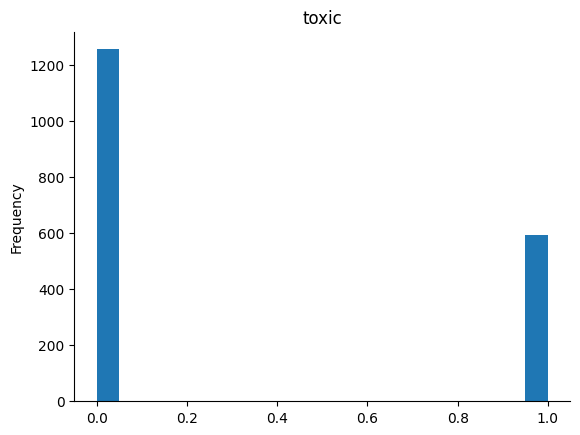

In [15]:
toxic, nontoxic = get_target_distribution(preprocessed_data)
print(f"Number of non toxic comment: {nontoxic}")
print(f"Number of toxic comment: {toxic}")
show_targed_distribution(preprocessed_data)

In [16]:
show_dist(preprocessed_data, 'punctuation')

In [17]:
show_dist(preprocessed_data, 'uppercase')

In [18]:
show_dist(preprocessed_data, 'words_count')

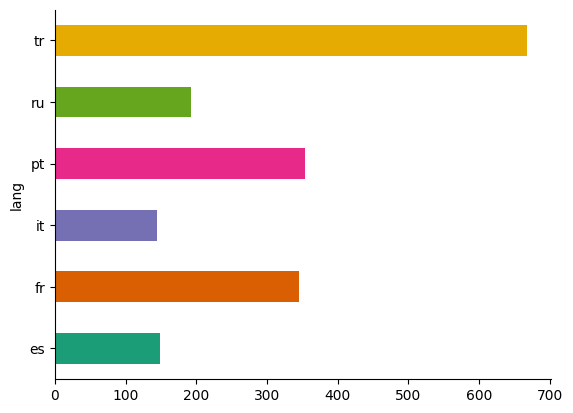

In [19]:
count_language(preprocessed_data)

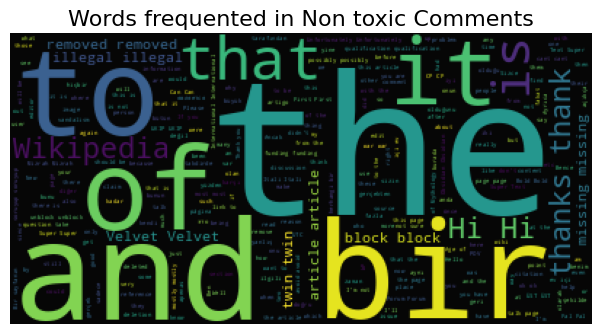

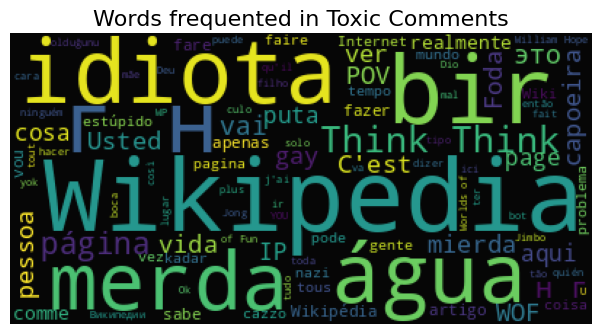

In [20]:
visualize_most_frequent_words(preprocessed_data, False)
visualize_most_frequent_words(preprocessed_data, True)

**Валидационная выборка**

Number of non toxic comment: 6770
Number of toxic comment: 1230


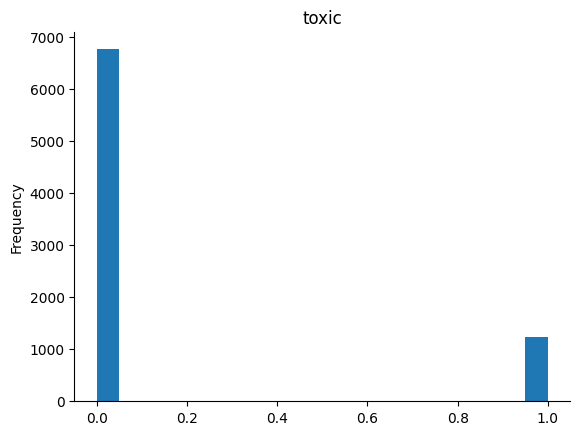

In [21]:
toxic, nontoxic = get_target_distribution(val_data)
print(f"Number of non toxic comment: {nontoxic}")
print(f"Number of toxic comment: {toxic}")
show_targed_distribution(val_data)

In [22]:
show_dist(val_data, 'punctuation')

In [23]:
show_dist(val_data, 'uppercase')

In [24]:
show_dist(val_data, 'words_count')

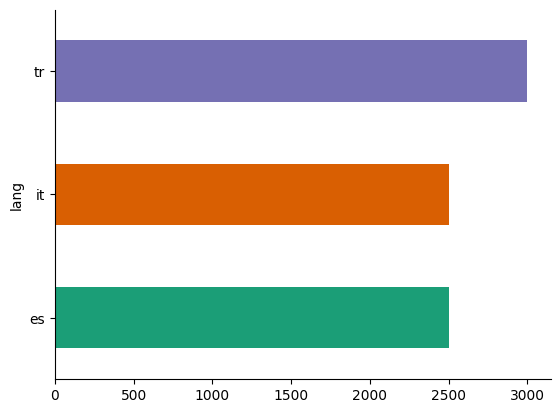

In [25]:
count_language(val_data)

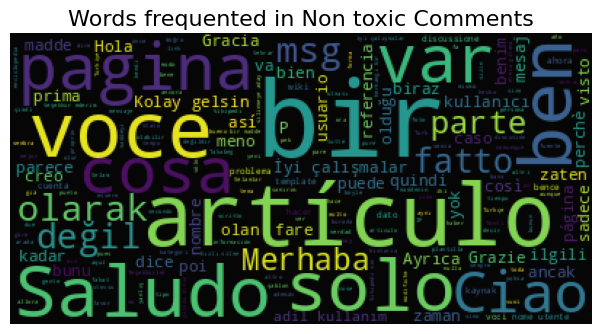

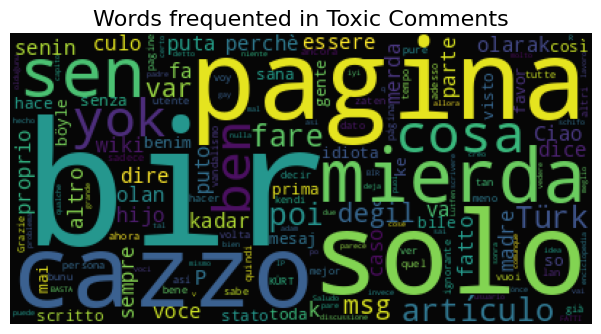

In [26]:
visualize_most_frequent_words(val_data, False)
visualize_most_frequent_words(val_data, True)

**Тестовые данные**

In [27]:
show_dist(test_data, 'punctuation', False, False)

In [28]:
show_dist(test_data, 'uppercase', False, False)

In [29]:
show_dist(test_data, 'words_count', False, False)

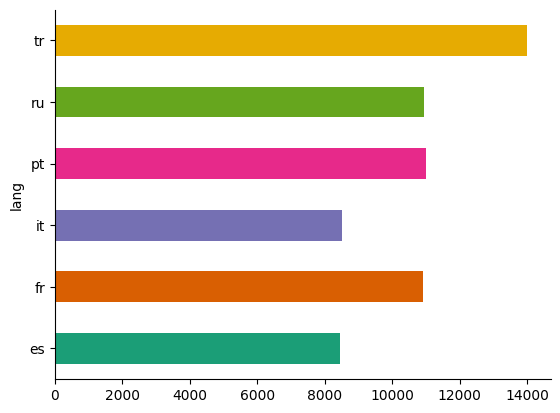

In [30]:
count_language(test_data)

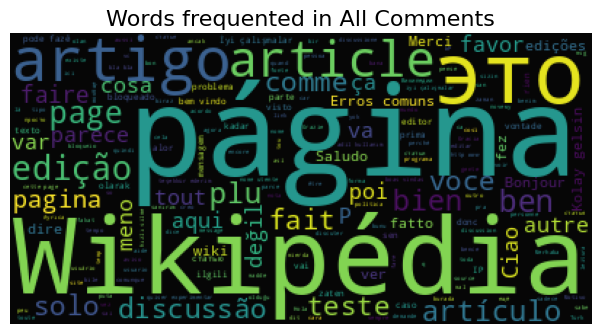

In [31]:
visualize_most_frequent_words_all(test_data)

# **Подготовка обучающих данных**

Как видно, обучающий датасет состоит из английских комментариев, в то время как тестовый датасет содержит тексты на других языках. В качестве препроцессинга данные из обучающего датасета были переведены на языки, встречающиеся в тестовой выборке. В силу ограниченности ресурсов предобработана была только часть данных, выбранных случайным образом с попыткой сбалансировать неравномерность распределения таргета в обучающей выборке.

In [ ]:
pipe_translation = pipeline("translation", model="facebook/mbart-large-50-many-to-many-mmt", device=device)

In [ ]:
languages = {
    'ru': 'ru_RU',
    'it': 'it_IT',
    'pt': 'pt_XX',
    'es': 'es_XX',
    'tr': 'tr_TR',
    'fr': 'fr_X'
}

In [ ]:
def translate_text(t, dest_lang):
  try:
    return pipe_translation(t, src_lang="en_EN", tgt_lang=dest_lang)[0]['translation_text']
  except Exception as e:
    return None

In [ ]:
def preprocess_dataset(data):
  new_dataset = pd.DataFrame()
  for lang, code in languages:
    for i in range(2):
      translated_data = data[(data['toxic']==1) & (data['comment_text'].str.split().apply(lambda x: len(x))<40)].sample(200)
      translated_data['comment_text'] = data['comment_text'].apply(lambda x: translate_text(x, code))
      translated_data = translated_data[translated_data['comment_text'].notnull()]
      new_dataset = pd.concat([new_dataset, translated_data])
  return new_dataset

In [ ]:
preprocessed_data = preprocess_dataset(train_data)
preprocessed_data.to_csv('/content/drive/MyDrive/toxic_comments/preprocessed_train_data.csv')